<a href="https://colab.research.google.com/github/Sarik123-long/Data-Analytics-with_Oasis_Infobyte/blob/main/Project_4_1_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import zipfile
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  if fn.endswith('.zip'):
    with zipfile.ZipFile(io.BytesIO(uploaded[fn]), 'r') as zip_ref:
        zip_ref.extractall('.')
    print(f'Successfully extracted {fn}')
  else:
    print(f'File {fn} is not a zip file.')

Saving archive (39).zip to archive (39).zip
User uploaded file "archive (39).zip" with length 7966522 bytes
Successfully extracted archive (39).zip


In [2]:
import pandas as pd

df = pd.read_csv('Twitter_Data.csv')

print("First 5 rows:")
display(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
display(df.describe())

print("\nNumber of unique values per column:")
display(df.nunique())

print("\nValue counts for 'category' column:")
display(df['category'].value_counts())

First 5 rows:


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB

Descriptive Statistics:


,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000



Number of unique values per column:


,0
clean_text,162976
category,3



Value counts for 'category' column:


,count
category,
1.0,72250
0.0,55213
-1.0,35510


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download necessary NLTK data
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')


# 1. Handle missing values
df.dropna(subset=['clean_text', 'category'], inplace=True)

# 2. Convert 'category' to integer type
df['category'] = df['category'].astype(int)

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return ""

    # 3. Convert to lowercase
    text = text.lower()

    # 4. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 5. Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text) # Keep only lowercase letters and spaces

    # Split into words
    words = text.split()

    # 6. Remove stop words and 7. Apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Join words back into a string
    text = ' '.join(words)

    # 8. Remove extra whitespace
    text = text.strip()

    return text

# Apply preprocessing function to 'clean_text' column
df['clean_text'] = df['clean_text'].apply(preprocess_text)

display(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,clean_text,category
0,modi promis minimum govern maximum govern expe...,-1
1,talk nonsens continu drama vote modi,0
2,say vote modi welcom bjp told rahul main campa...,1
3,ask support prefix chowkidar name modi great s...,1
4,answer among power world leader today trump pu...,1


In [5]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (130375,)
Shape of X_test: (32594,)
Shape of y_train: (130375,)
Shape of y_test: (32594,)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (130375, 5000)
Shape of X_test_tfidf: (32594, 5000)


In [7]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# Train the model
model.fit(X_train_tfidf, y_train)

print("Model training complete.")

Model training complete.


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8439
Precision: 0.8447
Recall: 0.8439
F1-score: 0.8426


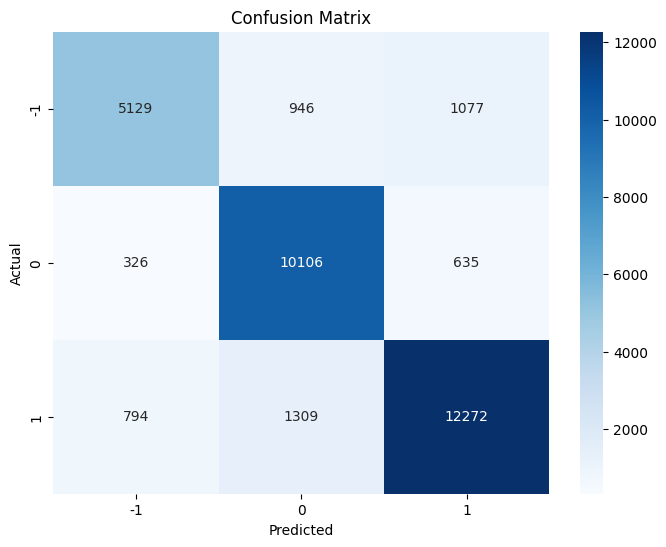

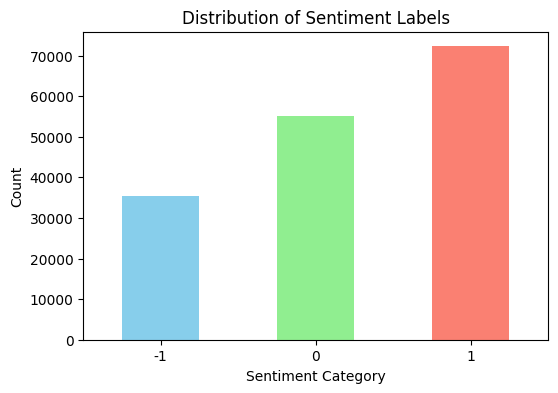

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate the value counts of the category column
sentiment_counts = df['category'].value_counts()

# Create a bar plot of the sentiment label distribution
plt.figure(figsize=(6, 4))
sentiment_counts.sort_index().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.xticks(rotation=0)
plt.show()